# **Applying Descriptive Statistics to the Student-score data (Part 1)**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('student-scores.csv')

df.head(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


# Creating 'cols_subjects' variable and calculating the mean of each subject's score inside the variable

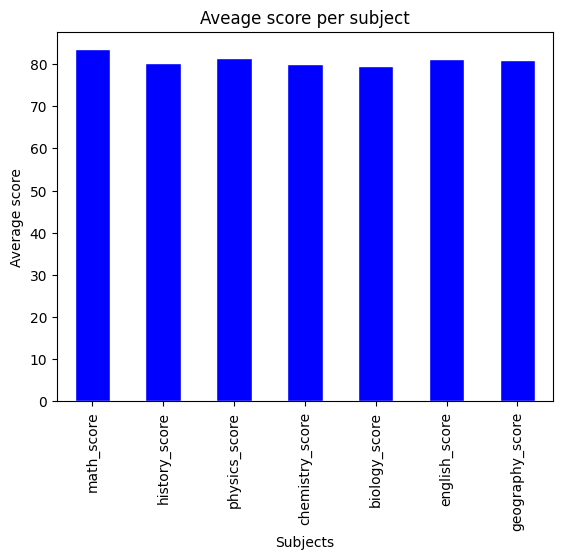

In [21]:
cols_subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score','biology_score', 'english_score', 'geography_score']

mean_of_subjects = df[cols_subjects].mean()
mean_of_subjects.plot(kind='bar', color='blue', edgecolor = 'white')
plt.title('Aveage score per subject')
plt.xlabel('Subjects')
plt.ylabel('Average score')
plt.show()

# Calculating the median of each subject

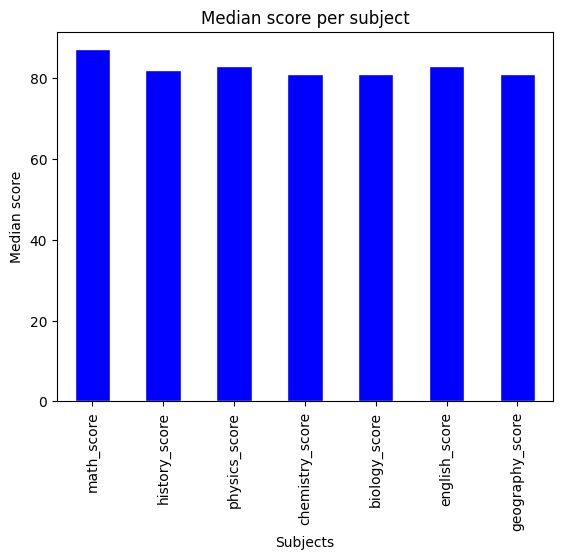

In [22]:
median_of_subjects = df[cols_subjects].median()
median_of_subjects.plot(kind='bar', color='blue', edgecolor = 'white')
plt.title('Median score per subject')
plt.xlabel('Subjects')
plt.ylabel('Median score')
plt.show()

# Calculating the mode of each subject

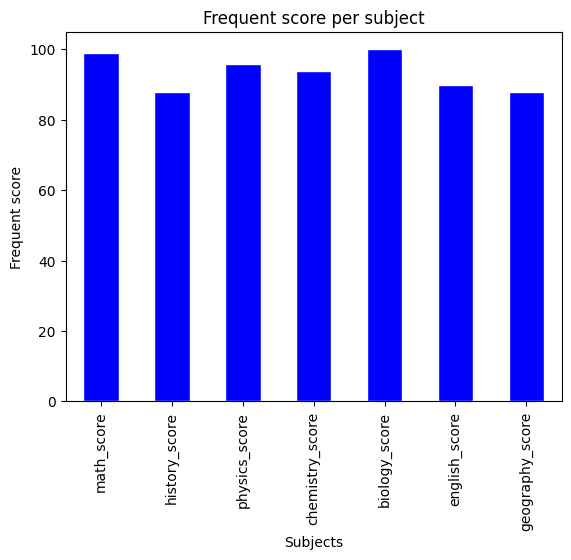

In [23]:
mode_of_subjects = df[cols_subjects].mode()
mode_series = mode_of_subjects.iloc[0]
mode_series.plot(kind='bar', color='blue', edgecolor = 'white')
plt.title('Frequent score per subject')
plt.xlabel('Subjects')
plt.ylabel('Frequent score')
plt.show()

# Creating an array for the range list

In [24]:
max_list = df[cols_subjects].max().tolist()
min_list = df[cols_subjects].min().tolist()
range_list = np.array(max_list) - np.array(min_list).tolist()
max_list, min_list, range_list



([100, 100, 100, 100, 100, 99, 100],
 [40, 50, 50, 50, 30, 50, 60],
 array([60, 50, 50, 50, 70, 49, 40]))

# Calculating the sample and population variance of subject scores

In [25]:
sample_variances = df[cols_subjects].var().round(2).tolist()
population_variances = df[cols_subjects].var(ddof=0).round(2).tolist()
sample_variances, population_variances

([174.9, 162.21, 157.24, 163.27, 188.3, 144.65, 135.44],
 [174.81, 162.13, 157.16, 163.19, 188.2, 144.58, 135.37])

# Calculating the sample and population standart deviation of subject scores
# Note: This is the crucial thing because it tells us how spread out the values around the mean

In [26]:
sample_stdev = df[cols_subjects].std().round(2).tolist()
population_stdev = df[cols_subjects].std(ddof=0).round(2).tolist()
sample_stdev, population_stdev

([13.22, 12.74, 12.54, 12.78, 13.72, 12.03, 11.64],
 [13.22, 12.73, 12.54, 12.77, 13.72, 12.02, 11.63])

# Calculating the standart deviation for the mean of the scores

In [27]:
avg_scores = df[cols_subjects].mean(axis=1).astype(int)
stdevs_avg = df[cols_subjects].std().round(2)
total = len(df)
avg_score = sum(avg_scores)/total
stdev_avg = sum(stdevs_avg)/len(cols_subjects)
avg_score, stdev_avg

(80.5585, 12.667142857142858)

# Finding the range within standart deviations

In [28]:
one_stdev = (avg_score - stdev_avg, avg_score + stdev_avg)
two_stdev = (avg_score - 2*stdev_avg, avg_score + 2*stdev_avg)
three_stdev = (avg_score - 3*stdev_avg, avg_score + 3*stdev_avg)
print("1 SD range", one_stdev)
print("2 SD range", two_stdev) 
print("3 SD range", three_stdev)



1 SD range (67.89135714285713, 93.22564285714286)
2 SD range (55.22421428571428, 105.89278571428571)
3 SD range (42.55707142857142, 118.55992857142857)


# Same thing, but for each subject

In [29]:
for col in cols_subjects:
    mean = df[col].mean()
    std = df[col].std()
    within_1sd = df[(df[col] >= mean - std) & (df[col] <= mean + std)].shape[0]
    print(f"{col}: % within 1 SD = {within_1sd/len(df)*100:.2f}%")
    within_2sd = df[(df[col] >= mean - 2*std) & (df[col] <= mean + 2*std)].shape[0]
    print(f"{col}: % within 2 SD = {within_2sd/len(df)*100:.2f}%")
    within_3sd = df[(df[col] >= mean - 3*std) & (df[col] <= mean + 3*std)].shape[0]
    print(f"{col}: % within 3 SD = {within_3sd/len(df)*100:.2f}%")

math_score: % within 1 SD = 69.35%
math_score: % within 2 SD = 94.65%
math_score: % within 3 SD = 98.70%
history_score: % within 1 SD = 61.25%
history_score: % within 2 SD = 97.80%
history_score: % within 3 SD = 100.00%
physics_score: % within 1 SD = 59.20%
physics_score: % within 2 SD = 98.05%
physics_score: % within 3 SD = 100.00%
chemistry_score: % within 1 SD = 55.95%
chemistry_score: % within 2 SD = 98.40%
chemistry_score: % within 3 SD = 100.00%
biology_score: % within 1 SD = 64.05%
biology_score: % within 2 SD = 97.45%
biology_score: % within 3 SD = 99.05%
english_score: % within 1 SD = 62.05%
english_score: % within 2 SD = 97.75%
english_score: % within 3 SD = 100.00%
geography_score: % within 1 SD = 57.00%
geography_score: % within 2 SD = 100.00%
geography_score: % within 3 SD = 100.00%


# Displaying it on pyplot for better understanding the distribution of our data

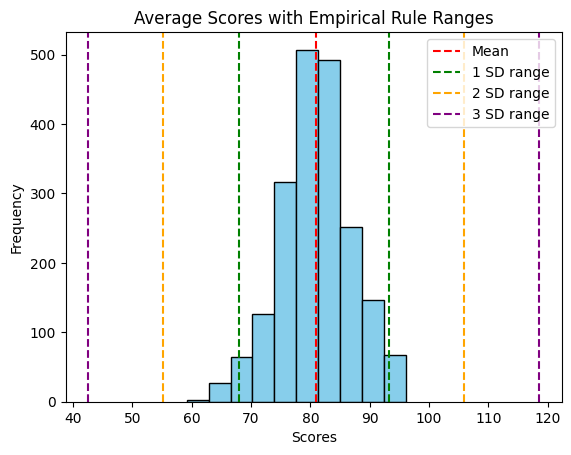

In [30]:
df['avg_scores'] = df[cols_subjects].mean(axis=1)

plt.hist(df['avg_scores'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='--', label='Mean')

# Draw SD ranges
plt.axvline(one_stdev[0], color='green', linestyle='--', label='1 SD range')
plt.axvline(one_stdev[1], color='green', linestyle='--')
plt.axvline(two_stdev[0], color='orange', linestyle='--', label='2 SD range')
plt.axvline(two_stdev[1], color='orange', linestyle='--')
plt.axvline(three_stdev[0], color='purple', linestyle='--', label='3 SD range')
plt.axvline(three_stdev[1], color='purple', linestyle='--')

plt.title('Average Scores with Empirical Rule Ranges')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()
